## DATA MINING AND INFORMATICS


# Task

##### **TASK:**

Apply four classifiers, i.e. Support Vector Machine (SVM), Decision Tree (DT), Random Forest (RF), and K-nearest neighbours (KNN) classifiers to the adult_WS#3 dataset available on Canvas to predict the income column. Calculate the confusion matrix and evaluation metrics for all classifiers. Plot the features' importance values, determine the three most important features (i.e. columns) which have the highest impact on the income and report them in the report cell  




In [ ]:
# Import Useful Libraries

import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Read in the data

data = pd.read_csv("/content/adult_WS#3.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
# Check data shape; row and column length

data.shape

(10000, 15)

In [ ]:
# Check for columns with null values

data.isnull().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

In [ ]:
# Drop the missing data.

data.dropna(inplace=True, axis=0)

data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# The printed first 5 records show some of the data contains unidentified wrong values or input (?). To clean this we use the following
# Replace all question marks with space. This way we can drop the columns or (bfill) like before.
# This is done using python replace() method.

data.replace("?", '', inplace=True)

# Fill the null space
data.dropna(inplace=True, axis=0)

In [ ]:
# Comfirm all mising values are gone

data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# Check the data types of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9765 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9765 non-null   int64 
 1   workclass       9765 non-null   object
 2   fnlwgt          9765 non-null   int64 
 3   education       9765 non-null   object
 4   education-num   9765 non-null   int64 
 5   marital-status  9765 non-null   object
 6   occupation      9765 non-null   object
 7   relationship    9765 non-null   object
 8   race            9765 non-null   object
 9   sex             9765 non-null   object
 10  capital-gain    9765 non-null   int64 
 11  capital-loss    9765 non-null   int64 
 12  hours-per-week  9765 non-null   int64 
 13  native-country  9765 non-null   object
 14  income          9765 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


## Data Preparation for classification

In [ ]:
# Extract the input and output variables.
# Our target (dependent) variable is income, while the rest of the data are the input data also known as independent variables.
# Assign the target variable to y using the loc indexing method and independent variables to X by dropping the target variable.

X = data.drop('income',axis=1)
y = data.loc[:,'income']

In [ ]:
# Check classification type to be done using count of unique values in target variable. The outcome shows 2 meaning binary classification type

y.nunique()

2

In [ ]:
# Count the values of y (income)

y.value_counts()

income
<=50K    7373
>50K     2392
Name: count, dtype: int64

In [ ]:
# Inspect the first two rows of X.

X.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States


## **Encoding Report**

In this step, the target variable (income) which is categorical is labelled or encoded using the label encoder, while other categorical variables in the dataset are encoded using ordinal encoder.
> It is important to encode variables to be used in machine learning models, this is because most models cannot read the categorical variables. It is done for compatibility with the machine learning models or algorithms to be used.

* The categorical variables are encoded using the ordinal encoder. This is done to reduce run time. However, only ordinal varies are encoded with an ordinal encoder and nominal categories with one hot encoder.
* The data is **normalized** to improve the performance of the model by making all the scales between 0 and 1.
* The classification type to be done is a **binary classification**. The target variable is encoded using a label encoder.




In [ ]:
# Encode the target variable to be in binary form for easy training and prediction of the income column which is the target variable

encoder = LabelEncoder()
y  = encoder.fit_transform(y)

# Print y variable
y

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# Get the columns in X
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
# To decrease the processing time, use an ordinal encoder for both nominal and ordinal input columns.

# Apply ordinal encoder to the categorical variables of the dataset

encoder = OrdinalEncoder()

# Encode the data
cls = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

X[cls] = encoder.fit_transform(X[cls])

In [ ]:
# Confirm all columns are encoded that is all columns are now numerical
X.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29,4.0,216481,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,38.0
1,36,4.0,280570,15.0,10,2.0,3.0,0.0,4.0,1.0,0,0,45,38.0
2,25,0.0,100903,9.0,13,2.0,0.0,5.0,4.0,0.0,0,0,25,38.0


In [ ]:
# Normalize the dataset

X = normalize(X.iloc[:, :])
X = pd.DataFrame(X, columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num',\
                            'marital-status', 'occupation', 'relationship', 'race', 'sex', \
                           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'])

# View normalized input data
X.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.000134,0.000018,1.0,0.000055,0.000065,0.000009,0.000018,0.000023,0.000018,0.000000,0.0,0.0,0.000185,0.000176
1,0.000128,0.000014,1.0,0.000053,0.000036,0.000007,0.000011,0.000000,0.000014,0.000004,0.0,0.0,0.000160,0.000135


### Classification

In [ ]:
# Libraries for hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Import the classification models to be used and evaluation metrics

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# split the dataset into train and test datasets.
# The train data would be used to train the model and the model's performance would be tested against the test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Hyper Parameters Tuning

In [ ]:
#  # Define the classification models and set varying parameters for the model to select the best fit; \
#  # This is done to select the best values/parameters that can generate the best performance for the model

# SVM
# sv_param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}

# SVM = GridSearchCV(SVC(), param_grid=sv_param_grid, refit = True, verbose = 3)
# SVM.fit(X_train, y_train)
# print(SVM.best_params_)
# output: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


#/---------------------------------------------------------------------------------------------------------------------------/
# Random Forest Classifier
# rf_param_grid = {
#     'n_estimators': [25, 50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
# }

# RF = GridSearchCV(RandomForestClassifier(), param_grid = rf_param_grid)
# RF.fit(X_train, y_train)
# print(RF.best_estimator_)

#/---------------------------------------------------------------------------------------------------------------------------/
# Decison Tree
# param_dist = {
#     "max_depth": [3, None],
#     "max_features": randint(1, 9),
#     "min_samples_leaf": randint(1, 9),
#     "criterion": ["gini", "entropy"]
# }
# DT = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, cv=5)
# DT.fit(X, y)

# print("Decision Tree Best Parameters: {}".format(DT.best_params_))
# print("Best score is {}".format(DT.best_score_))

#/---------------------------------------------------------------------------------------------------------------------------/
# K NeighborsClassifier

# k_range = list(range(1, 31))
# param_grid = dict(n_neighbors=k_range)

# # defining parameter range
# KNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# # Fit the model created
# grid_search = KNN.fit(X, y)
# print(grid_search.best_params_)


### Hyperparameters Tuning Report

Hyperparameter tuning was done using the code above to find the best-performing parameters for building the different models used. This was done by defining the grid for each of the models used and setting varying parameters.
Grid Search and Randomized Search iterate through the grid of parameters to get the best-performing parameters for the model.

The results of tuning for each of the models are as follows;
* Support Vector Machine: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

* Random Forest Classifier: {'max_depth':9, 'max_features':None, 'max_leaf_nodes':9, 'n_estimators':50}

* Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3}

* Kneighbos Classifier: {'n_neighbors': 30}




In [ ]:
# Define a function for printing all the evaluation metrics  for the models
# The function defined below takes in the confusion matrix and outputs the evaluation metrics for the models.
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))

    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

# **Modelling**

###  **Support Vector Machine**

SVM metrics

True Positives: 142
True Negatives: 2155
False Positives: 38
False Negatives: 595
--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
Sensitivity: 0.19
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.32





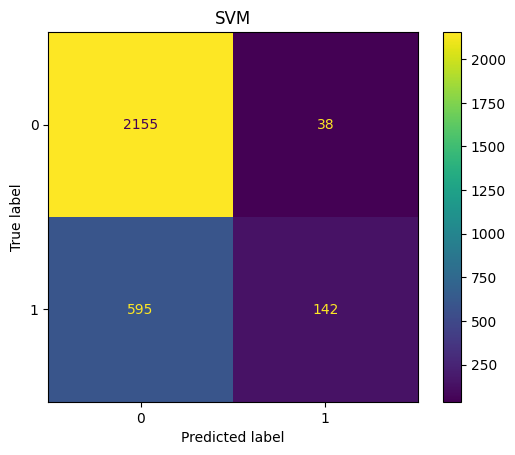

In [ ]:
# Define the classification  model using output from the hyperparameters tuning
SVM = svm.SVC(C = 1000, gamma = 1, kernel ='rbf')


# Train the models using the train datasets
# During the training, the model learns patterns and styles from the training data
SVM.fit(X_train, y_train)


# After training the model, the trained model is tested by predicting the target data.
# Predict the target data
y_svm = SVM.predict(X_test)


# Create the confusion matrix for svm prediction
cm1 = confusion_matrix(y_test, y_svm, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("SVM")

# Print the evaluation metrics
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')

### **Random Forest Classifier**

RF metrics

True Positives: 214
True Negatives: 2138
False Positives: 55
False Negatives: 523
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.29
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.45


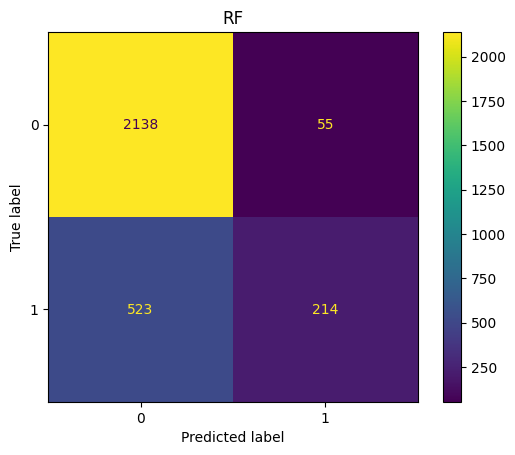

In [ ]:
# Define the classification  model using output from the hyperparameters tuning
RF = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9, n_estimators=50)

# Train the models using the train datasets
RF.fit(X_train, y_train)

# Predict the target data
y_rf = RF.predict(X_test)

# Create the confusion matrix for the random forest classifiers' prediction
cm2 = confusion_matrix(y_test, y_rf, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("RF")

# Print the evaluation metrics
print('RF metrics\n')
confusion_metrics(cm2)

### **K Neighbors Classifier**

KNN metrics

True Positives: 202
True Negatives: 2094
False Positives: 99
False Negatives: 535
--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
Sensitivity: 0.27
Specificity: 0.95
Precision: 0.95
f_1 Score: 0.43


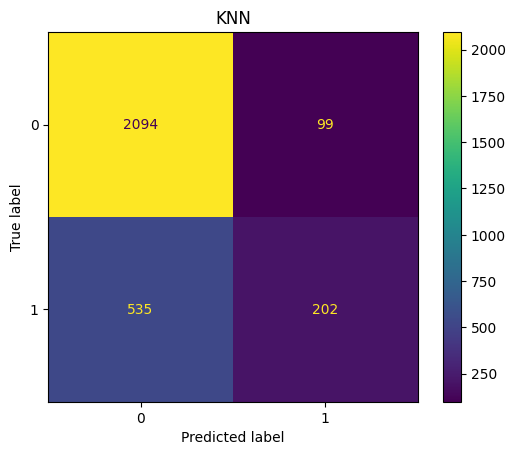

In [ ]:
# Define the classification  model using output from the hyperparameters tuning
KNN = KNeighborsClassifier(n_neighbors= 30)


# Train the models using the train datasets
KNN.fit(X_train, y_train)

# Predict the target data
y_knn = KNN.predict(X_test)

# Create the confusion matrix for the KNeighborsClassifier model prediction
cm3 = confusion_matrix(y_test, y_knn, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("KNN")

# Print the evaluation metrics
print('KNN metrics\n')
confusion_metrics(cm3)

### **Decision Trees**

DT metrics

True Positives: 210
True Negatives: 2130
False Positives: 63
False Negatives: 527
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.28
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.44


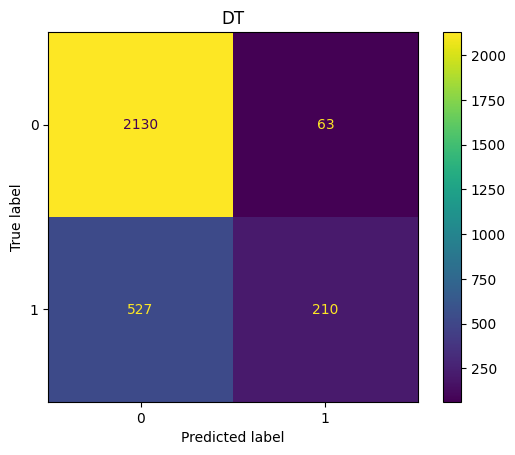

In [ ]:
# Define the classification  model using output from the hyperparameters tuning

DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, max_features= 7, min_samples_leaf= 3)

# Train the models using the train datasets
# During the training, the model learns patterns and styles from the training data

DT.fit(X_train, y_train)

# After training the model, the trained model is tested by predicting the target data.
# Predict the target data

y_dt = DT.predict(X_test)

# Create the confusion matrix for the decision tree model prediction
cm4 = confusion_matrix(y_test, y_dt, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")

# Print the evaluation metrics
print('DT metrics\n')
confusion_metrics(cm4)

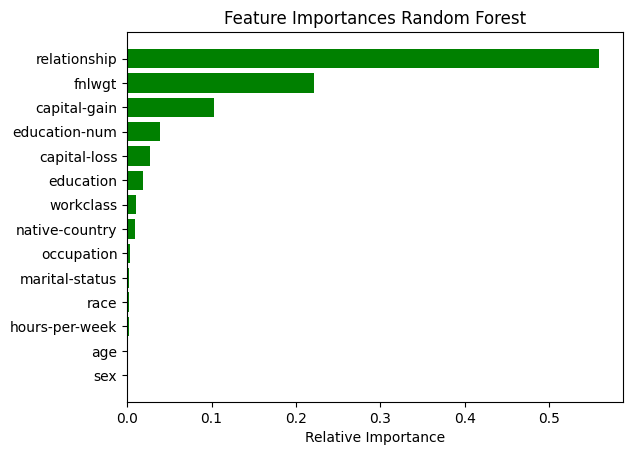

In [ ]:
# Using feature_importances_, show the important features in the dataset

features = data.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances Random Forest')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Report: The Feature Importance Plot Explained

Feature importance is an important preprocessing method done to select the best or the most important features for predicting the target variable. It gives a plot of all features used or to be used in the machine model based on the impact of the feature on the target variable. They are sorted in order of importance.

For our target variable income, according to the feature importance for predicting income, the most impactful features in the dataset are;
* Relationship
* fnlwgt
* Capital-gain


